In [1]:
import DDFS
from DDFS.element import *
%matplotlib inline

import DDFS.kalman_method as km
import DDFS.analytic_method as am
import DDFS.design_dectetor  as design_dectetor

from DDFS.element import *
from copy import deepcopy
np.set_printoptions(precision=4, suppress=True)

Detector fast Design & Test package is initialized.


In [2]:
######## 1. Define the parameters for the emitter ########

para_p = {
    "type": "steps",
    "maxvalue": 120,
    "minvalue": 2,
    "steps": 10,
    "count": 0
}

para_t = {
    "type": "fixed",
    "value": 0.3
}

para_phi = {
    "type": "even",
    "minvalue": -3.14,
    "maxvalue": 3.14,
}

emit_mode = {
    "p": para_p,
    "theta": para_t,
    "phi": para_phi
}

In [3]:
######## 2. Define Particle and Emitter ########


p = Particle()
p.update_particle("Charge", -1)
p.update_particle("Mass", 0.106)
print(p)




m = Emitter()
m.add_particle(p, 1, deepcopy(emit_mode)) # p, possibility of particles, emit_mode


print(m)


Charge has been changed to -1

Mass has been changed to 0.106
Particle INFO: 
--------------------------------------------------
Mass: 0.106	 Charge: -1	 Beam_spot: -1.0
--------------------------------------------------

0.11
Emitter INFO: 
--------------------------------------------------
Idx:0	 Mass0.106	 Weight: 100%	 Emit_mode: {'p': {'type': 'steps', 'maxvalue': 120, 'minvalue': 2, 'steps': 10, 'count': 0}, 'theta': {'type': 'fixed', 'value': 0.3}, 'phi': {'type': 'even', 'minvalue': -3.14, 'maxvalue': 3.14}}

--------------------------------------------------



In [4]:
######## 3. Define the Envirment ########



e = Environment()
e.update_environment("B", 3)
e.update_environment("position_resolution", True)
e.update_environment("multiple_scattering", True)


print(e)

Environment INFO: 
--------------------------------------------------
B:	3
multiple_scattering:	True
position_resolution:	True
--------------------------------------------------



      Radius    Budget  Half_z  Location 0  Location 1  Efficiency
0     10.350  0.001718    3000      9.9000      9.9000         0.0
1     12.350  0.003000    3000      0.0028      0.0028         1.0
2     14.350  0.003000    3000      0.0060      0.0060         1.0
3     34.325  0.003000    3000      0.0040      0.0040         1.0
4     36.325  0.003000    3000      0.0040      0.0040         1.0
..       ...       ...     ...         ...         ...         ...
86  1743.000  0.000132    3000      0.1000      2.8300         1.0
87  1761.000  0.000132    3000      0.1000      2.8300         1.0
88  1779.000  0.000132    3000      0.1000      2.8300         1.0
89  1800.000  0.013000    3000      9.9000      9.9000         0.0
90  1810.000  0.006500    3000      0.0072      0.0860         1.0

[91 rows x 6 columns]
geometry 1


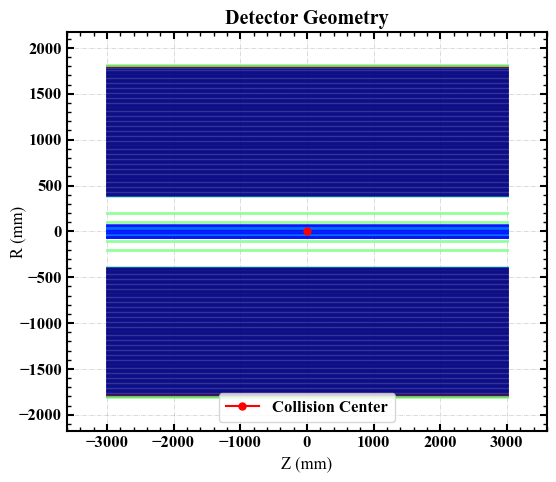

geometry 2


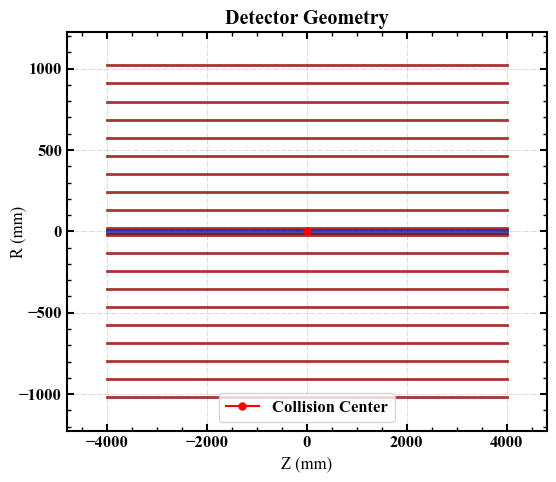

In [5]:
######## 4. Define the Detector ########

d = Detector()



d.load_designed(r"D:\files\pyproj\dec_use\design.csv")
d.update_layer(0, "Radius", 15)
d.store_designed(r"D:\files\pyproj\dec_use\design2.csv")

d2 = Detector()
d2.add_layer(SiLayer(0.0015, 10, 4000, 0, 9.9, 9.9))
for i in np.linspace(20, 1020, 10):
    d2.add_layer(SiLayer(0.002, i, 4000, 1, 0.004, 0.004))




d.visualize_detector()
print("geometry 1")
plt.show()
d2.visualize_detector()
print("geometry 2")
plt.show()

In [6]:
######## 5. Define the analytic and kalman Resolution ########




dec_info = d.get_param()
envir_info = e.get_param()
res_a = am.Resolution(dec_info, envir_info, m) # analytic method
res_k = km.Resolution(dec_info, envir_info, m) # kalman method

